# Prosper Loan Data Exploration
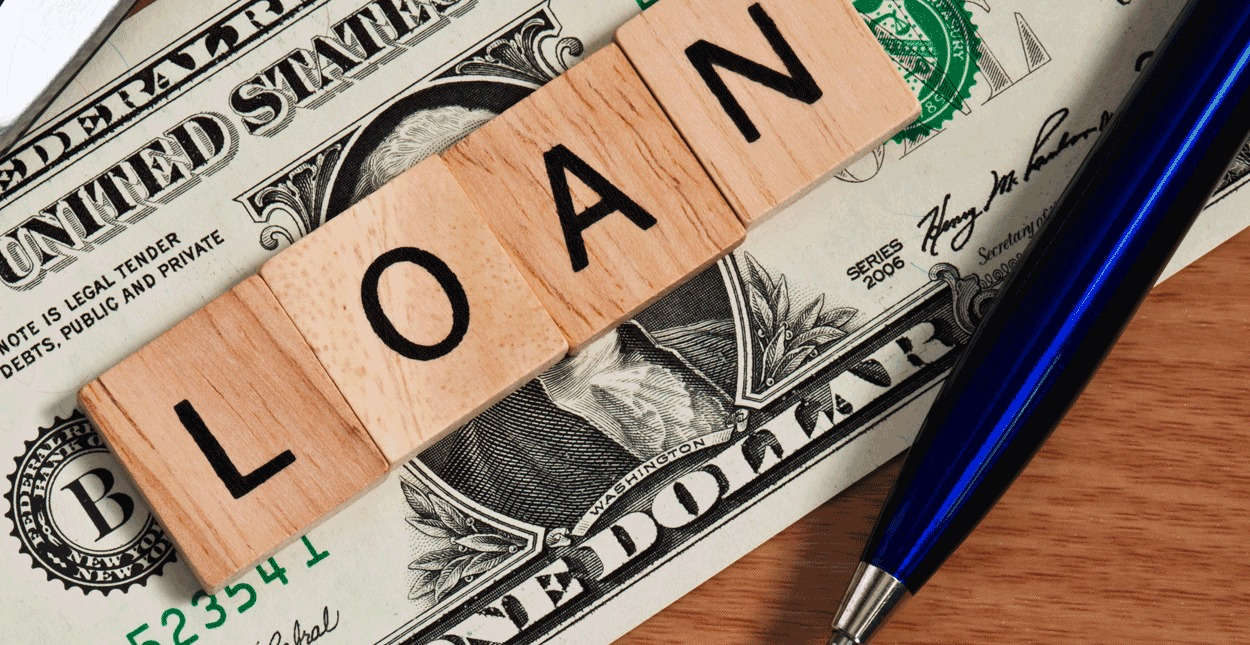

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
df_loan.shape

(113937, 81)

In [13]:
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [6]:
# view the statistics
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
#Check for duplicate records
sum(df_loan.duplicated())

0

In [8]:
# see number of null values on each columns
df_loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
# filter out loans without ProsperScores
df_loan = df_loan[df_loan['ProsperScore'].isnull()==False]

In [18]:
# remove columns with empty values that are not useful in the Dateset
df_loan.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

In [19]:
df_loan.Term.value_counts()

36    58695
60    24545
12     1613
Name: Term, dtype: int64

In [20]:
df_loan.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. We will not explore all the 81 attributes of this data set. I have dropped few columns which have empty values.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting which loans will default. This is the common question asked will working with loan data. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The Prosper Rating and Score could show whether the borrower will pay back or be a defaulter. The Borrower's APR can be analyzied with many factors such as the borrower's rating, score, occupation and income that could influence change.Creditscore could also have similar effect on Borrower's APR as Prosper Rating.

## Univariate Exploration

In [23]:
# check where APR has the most counts
df_loan.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
Name: BorrowerAPR, dtype: int64

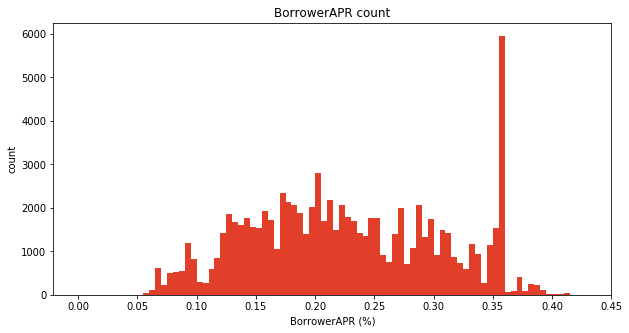

In [31]:
# see the counts for all BorrowerAPR values
plt.figure(figsize=(10,5))
colors = ["#E13F29"]
bins = np.arange(0, df_loan['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins,color=colors)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan['BorrowerAPR'].max()+0.05, 0.05));

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [30]:
#Prosper Score
df_loan['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

Text(0, 0.5, 'ProsperScore')

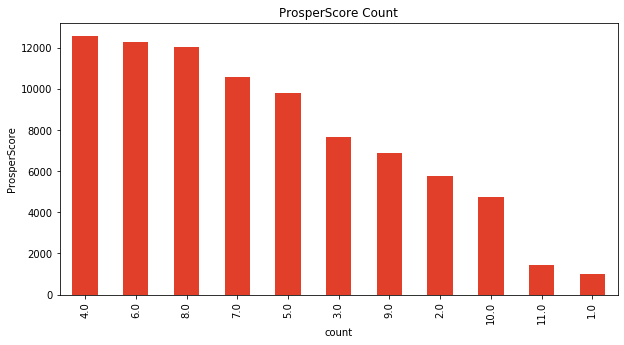

In [34]:
# see which ProsperScore borrowers received the most
plt.figure(figsize=(10,5))
df_loan['ProsperScore'].value_counts().plot(kind='bar',color=colors)
plt.title('ProsperScore Count')
plt.xlabel('count')
plt.ylabel('ProsperScore')

ProsperScore Count: Seems most borrower are given with low score. The lower the score, the higher borrower counts it has.

Text(0, 0.5, 'Occupation')

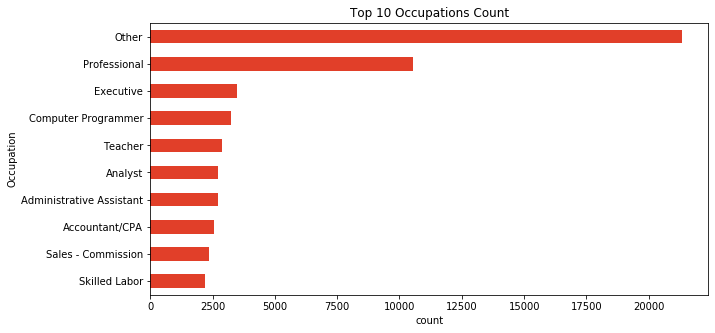

In [37]:
# see the top 10 occupations of borrowers
plt.figure(figsize=(10,5))
df_loan['Occupation'].value_counts()[9::-1].plot(kind='barh',color=colors)
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')

Top 10 Occupations Count: most borrowers enter their occupations as "others" or "professional" because they might not want to share this information. The rest of the occupations do not show big increase compare to others.

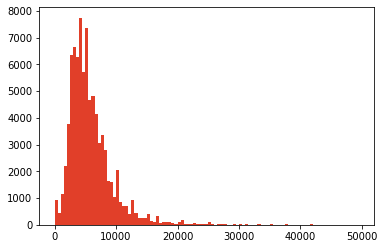

In [39]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins_smi, color=colors);

The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30k.

In [40]:
# Check borrowers with stated monthly income greater than 1e5
df_loan[df_loan.StatedMonthlyIncome>1e5]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8066,36,Completed,0.35643,0.3199,0.3099,0.29170,0.1830,0.10870,1.0,HR,...,-6.68,-59.23,0.0,0.0,0.0,1.0,0,0,0.0,10
17411,36,Completed,0.35643,0.3199,0.3099,0.29570,0.1470,0.14870,2.0,E,...,-12.68,0.00,0.0,0.0,0.0,1.0,0,0,0.0,128
35218,36,Completed,0.07389,0.0705,0.0605,0.05450,0.0060,0.05450,7.0,AA,...,-15.95,0.00,0.0,0.0,0.0,1.0,0,0,0.0,58
45028,36,Current,0.33973,0.2999,0.2899,0.27660,0.1490,0.12760,2.0,E,...,-55.85,0.00,0.0,0.0,0.0,1.0,0,0,0.0,15
53014,12,Completed,0.25785,0.1795,0.1695,0.15590,0.0975,0.05840,3.0,D,...,-22.17,0.00,0.0,0.0,0.0,1.0,0,0,0.0,93
53167,36,Current,0.35797,0.3177,0.3077,0.28960,0.1650,0.12460,1.0,HR,...,-57.63,-59.06,0.0,0.0,0.0,1.0,0,0,0.0,2
57133,36,Current,0.35643,0.3199,0.3099,0.29570,0.1470,0.14870,2.0,E,...,-70.90,0.00,0.0,0.0,0.0,1.0,0,0,0.0,72
59298,36,Current,0.24246,0.2049,0.1949,0.19040,0.0890,0.10140,4.0,C,...,-215.66,0.00,0.0,0.0,0.0,1.0,0,0,0.0,204
80075,36,Current,0.20217,0.1655,0.1555,0.14559,0.0674,0.07819,4.0,C,...,-21.23,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
82831,36,Current,0.31012,0.2710,0.2610,0.24910,0.1275,0.12160,2.0,E,...,-47.41,0.00,0.0,0.0,0.0,1.0,0,0,0.0,6


In [41]:
# Get percent of borrowers whose stated monthly income greater than 30k
(df_loan.StatedMonthlyIncome>30000).sum()/float(df_loan.shape[0])

0.0029344867005291504

Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outlier for the following analysis, so it is better to remove borrower records with income greater than 30k.

In [43]:
# remove loans with stated monthly income greater than 30k, which are outliers
df_loan = df_loan[df_loan.StatedMonthlyIncome<=30000]

## Exploring the data: loan characteristics 

In [61]:
df_loan.LoanStatus.value_counts()

Current                   56400
Completed                 19606
Chargedoff                 5325
Defaulted                  1005
Past Due (1-15 days)        804
Past Due (31-60 days)       363
Past Due (61-90 days)       312
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      204
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [70]:
df_loan.Term.value_counts()

36    58517
60    24484
12     1603
Name: Term, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

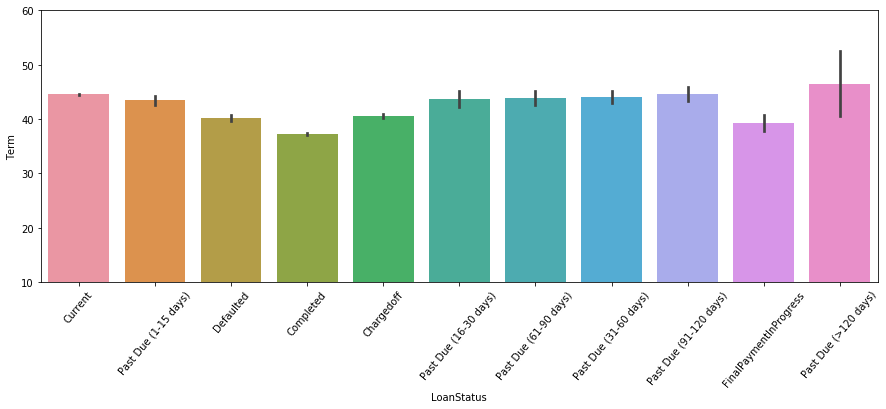

In [80]:
plt.figure(figsize=(15,5))
sb.barplot(x="LoanStatus", y="Term", data=df_loan).set_ylim([10, 60])
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

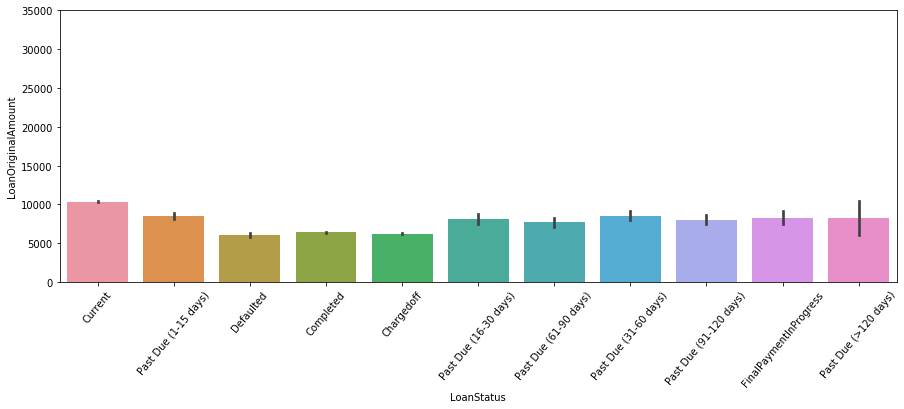

In [83]:
plt.figure(figsize=(15,5))
sb.barplot(x="LoanStatus", y="LoanOriginalAmount", data=df_loan).set_ylim([0,35000])
plt.xticks(rotation=50)

In [71]:
df_loan["BorrowerRate"].describe()

count    84604.000000
mean         0.196096
std          0.074633
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

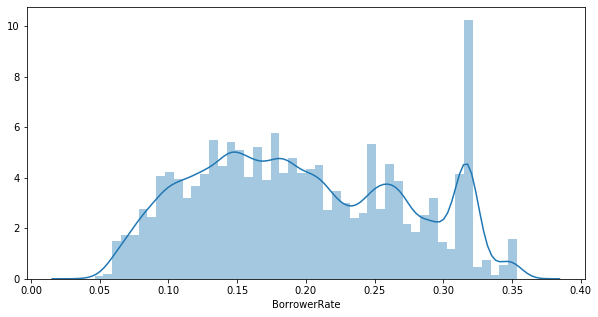

In [89]:
plt.figure(figsize=(10,5))
sb.distplot(df_loan["BorrowerRate"]);

The mean interest rate (without any fees) for all Prosper loans is a fairly substantial 20.35%.

# Bivariate Exploration

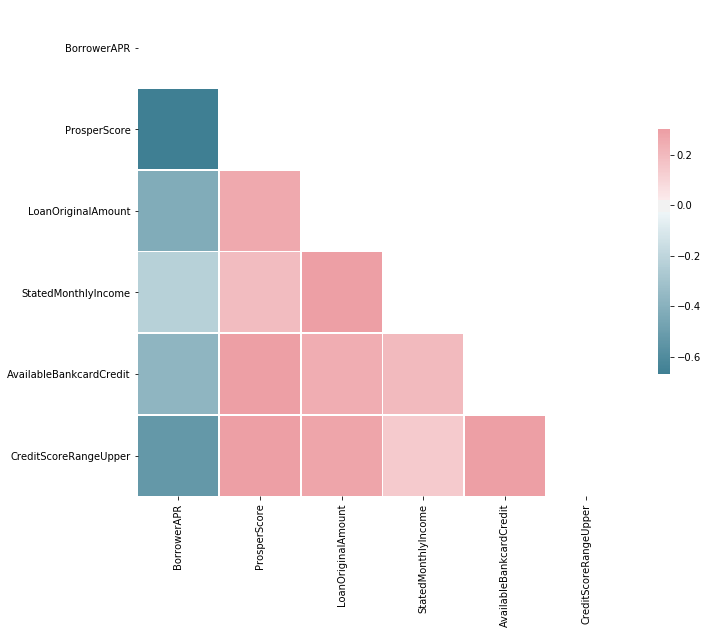

In [92]:
# Compute the correlation matrix
d = ['BorrowerAPR', 'ProsperScore', 'LoanOriginalAmount', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']
corr = df_loan[d].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

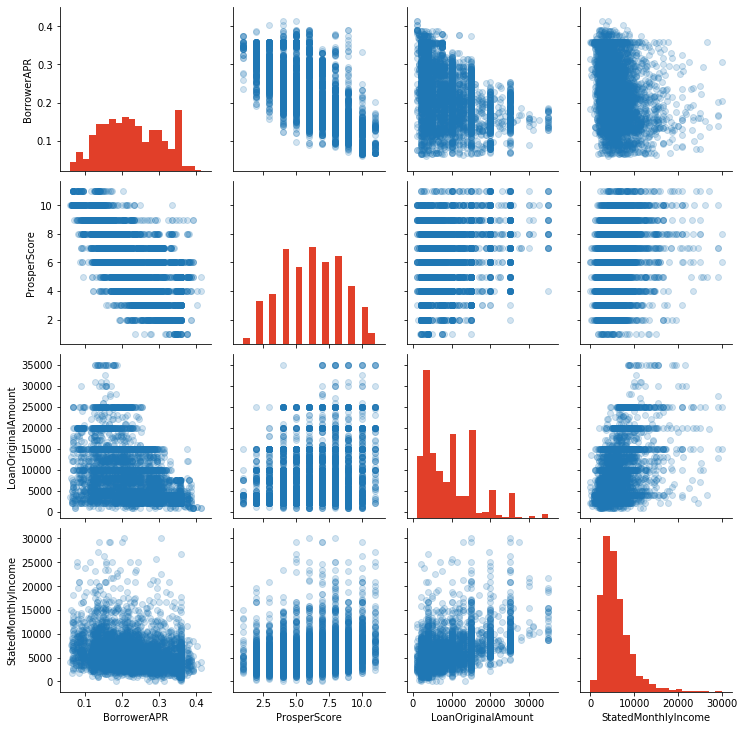

In [98]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
d = ['BorrowerAPR', 'ProsperScore', 'LoanOriginalAmount', 
            'StatedMonthlyIncome']
df_loan_samp = df_loan.sample(5000)
g = sb.PairGrid(data = df_loan_samp.dropna(), vars = d)
g = g.map_diag(plt.hist,color=colors, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

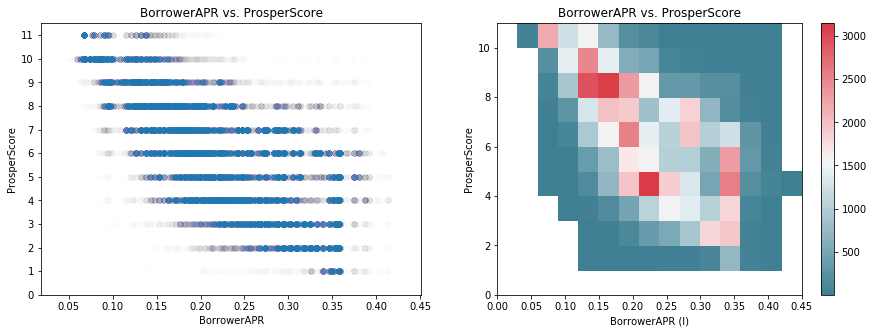

In [100]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan['ProsperScore'].max()+1, 1)
# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)
plt.hist2d(data = df_loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = cmap, cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

BorrowerAPR vs. ProsperScore: This make sense becasue people with higher rating tend to be more reliable and therefore given lower BorrowerAPR

C:\Users\divya\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

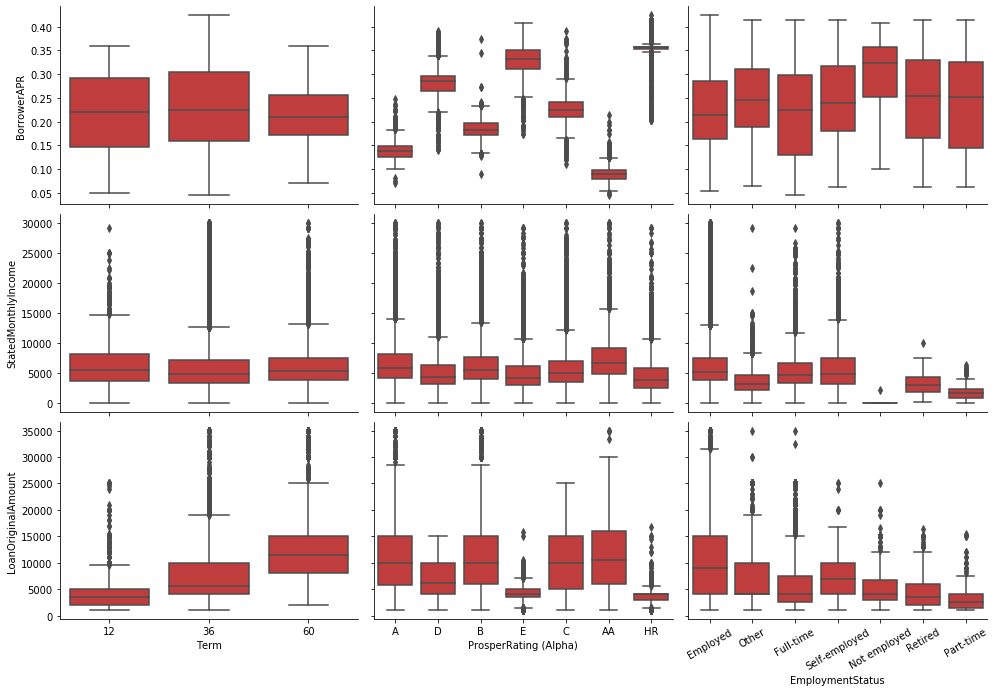

In [105]:
# plot matrix of numeric features against categorical features.
cvars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[3]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cvars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the loan amount is increased with the increase of loan term. The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

# Multivariate Exploration

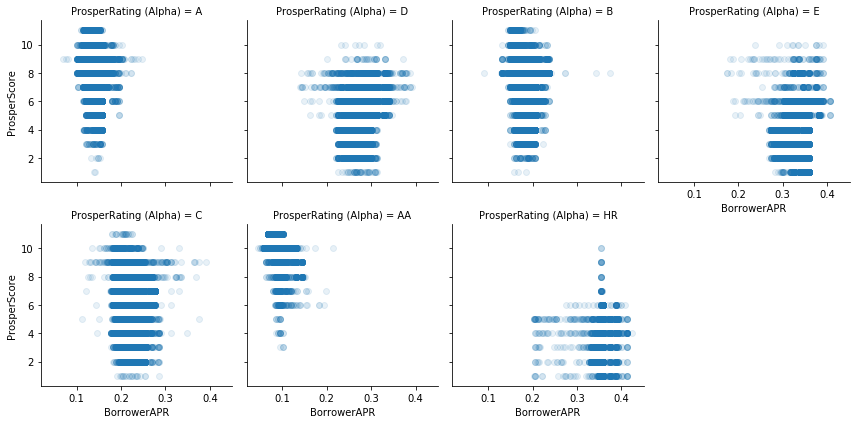

In [112]:
g = sb.FacetGrid(data = df_loan, col = 'ProsperRating (Alpha)', col_wrap = 4, height= 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore');

This visualization helps to analyze BorrowerAPR vs ProsperScore on difference letter ratings. The patterns shows the lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. This visualization differenate groups of people in terms of APR received based on their rating and scores.

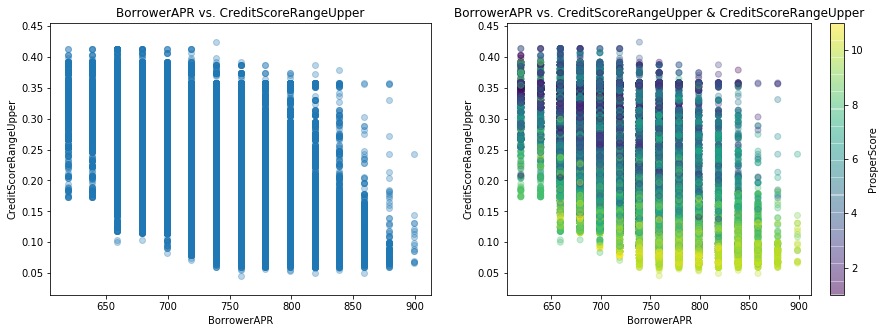

In [115]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = df_loan, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore: Since CreditScoreRangeUpper and ProsperScore are positive correlated to borrowerAPR, this visualization helps to see the effects on BorrowerAPR again. We can see the CreditScoreRangeUpper increase as BorrowerAPR decrease in the plots. By adding ProsperScore to color encodings, BorrowerAPR decreases as ProsperScore increases. This proves the point that CreditScoreRangeUpper and ProsperScore negatively correlated to BorrowerAPR.

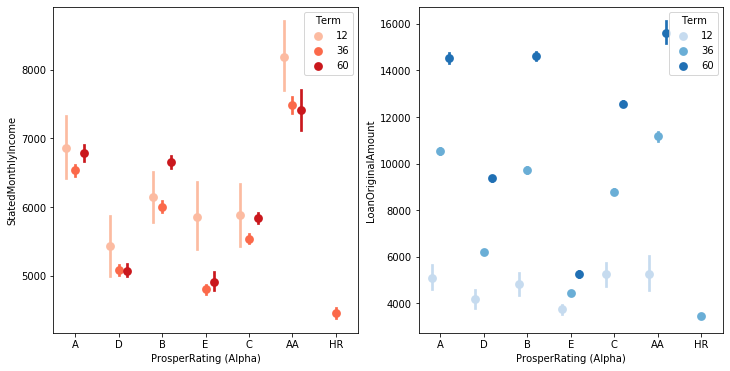

In [118]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Reds', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1]);

For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The correlation and matrix plots in previous plots can also be counted as part of Multivariate Exploration. To be more efficient, these two plots can be done ealier part of exploration to preview all variables and how they interact to each other. Adding to that, FacetGrid shows how each rating groups differ in terms of BorrowerAPR vs ProsperScore.

From all above visualizations created from univariate exploration to multivariate exploration, many variable are found to be negatively correlated to BorrowerAPR, whereas ProspoerScore gives the strongest negative relationship.

Looking further into loan performance, I found that most defaulting loans, have paid higher interest rates and received worse credit ratings than performing loans. However, there are many cases where defaulting loans have either paid relatively low interest, received very good credit ratings or both. This clearly is a weakness of the Prosper Platform, since it fails to compensate investors who bear a higher risks with adequate interest in a quite a lot of cases.

Moreover, I found that ProsperScore is a good measure to predict loan performance and actual returns. Especially the most important and intended low-risk ProsperScores 8 and 9 have lower default rates compared to worse Prosper scores. However, it is also the case that the difference in default rate between the most important ProsperScores 5 to 9 are not really significant. Moreover, Prosper was not able to significantly decrease the share of non-performing loans over the past years.

Finally, I found that specific jobs, states and loan duration have an influence on loan performance and actual returns.